### In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

features.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
features['Price'] = targets
features.head()
boston_data = features
boston_data.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Data Exploration

In [4]:
#Let's understand the statistics
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#Checking for null values
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

#### There are no missing values

### Numerical features

There can be discrete and continuous numerical variables. 

#### Discrete numerical features.

In [6]:
# list of numerical variables
numerical_features = [feature for feature in boston_data.columns if boston_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
boston_data[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
discrete_feature=[feature for feature in numerical_features if len(boston_data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [8]:
discrete_feature

['CHAS', 'RAD']

In [9]:
boston_data[discrete_feature].head()

,CHAS,RAD
0,0.0,1.0
1,0.0,2.0
2,0.0,2.0
3,0.0,3.0
4,0.0,3.0


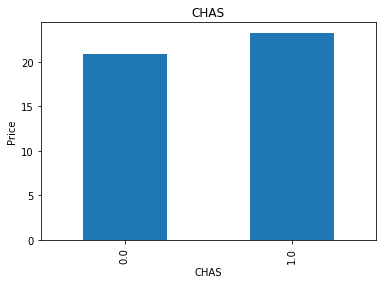

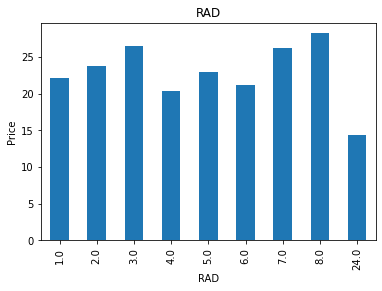

In [10]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=boston_data.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

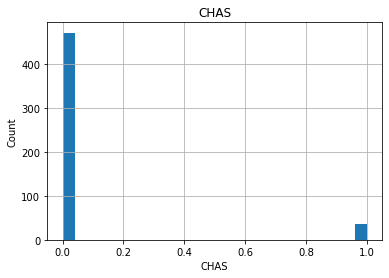

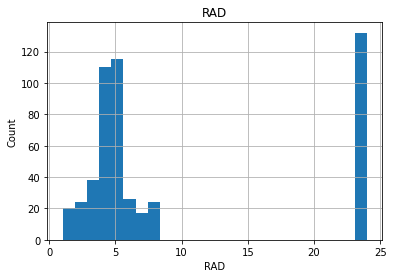

In [11]:
for feature in discrete_feature:
    data=boston_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Continuous Numerical features

In [12]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


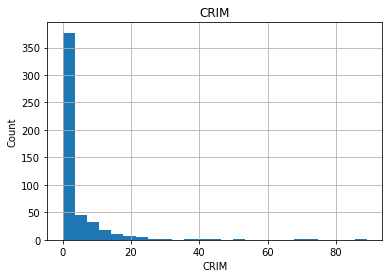

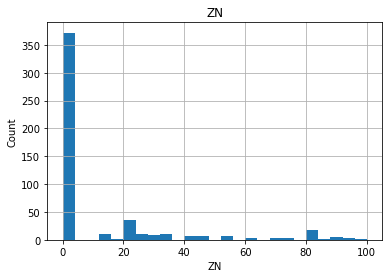

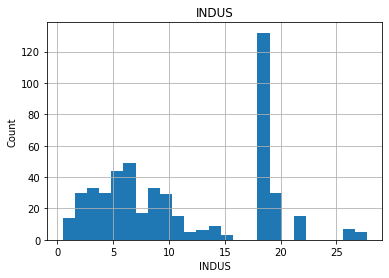

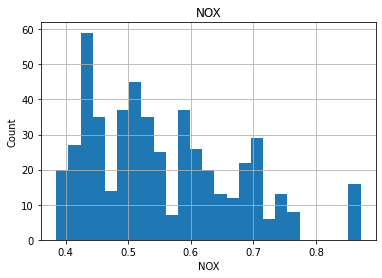

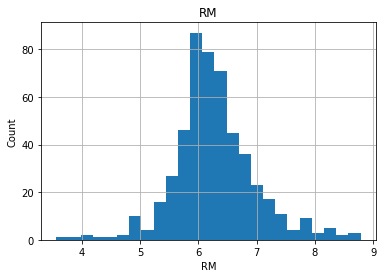

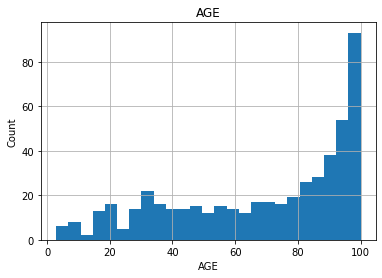

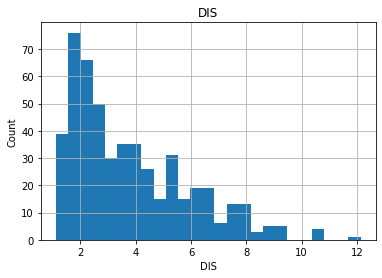

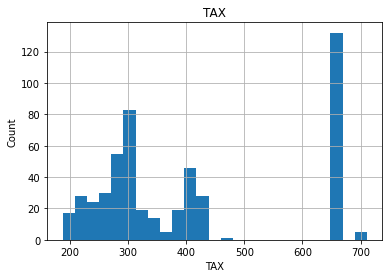

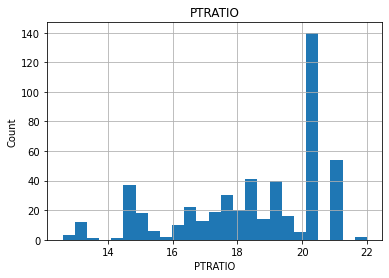

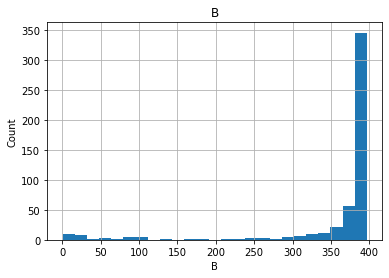

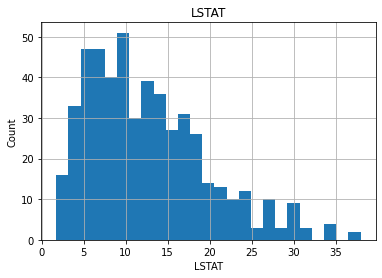

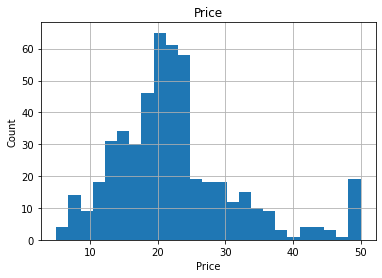

In [13]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=boston_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

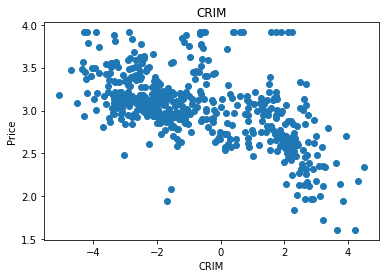

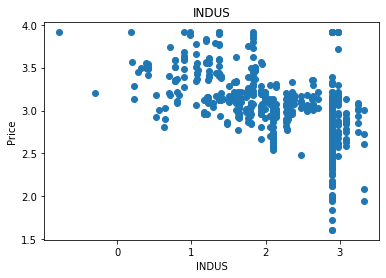

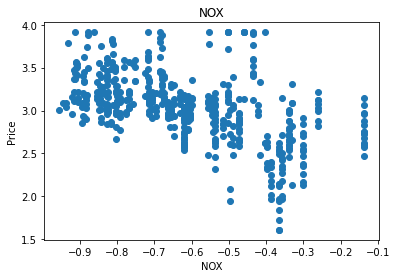

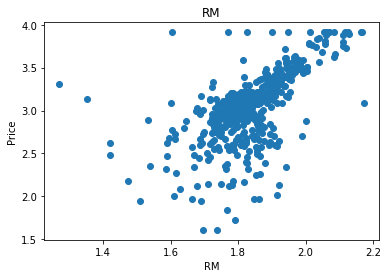

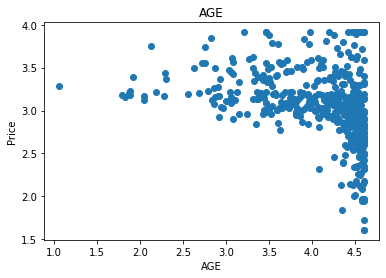

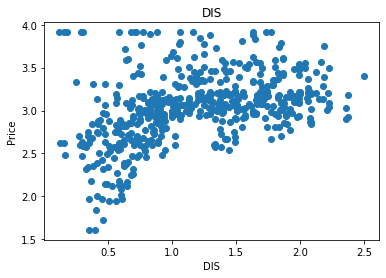

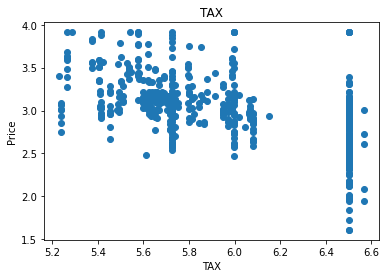

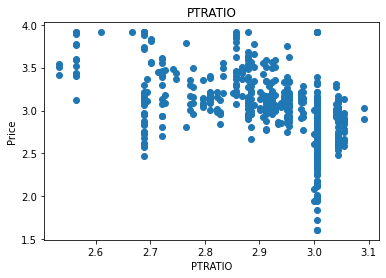

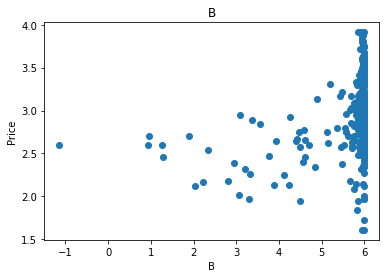

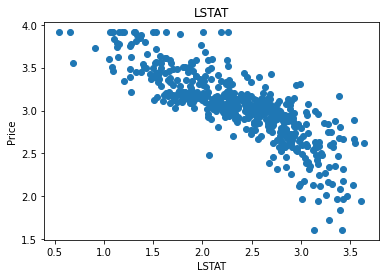

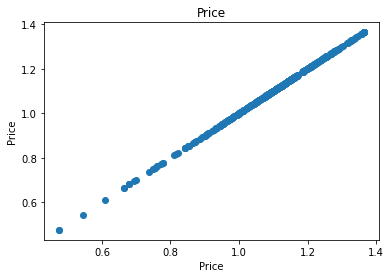

In [14]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=boston_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

#### Outliers

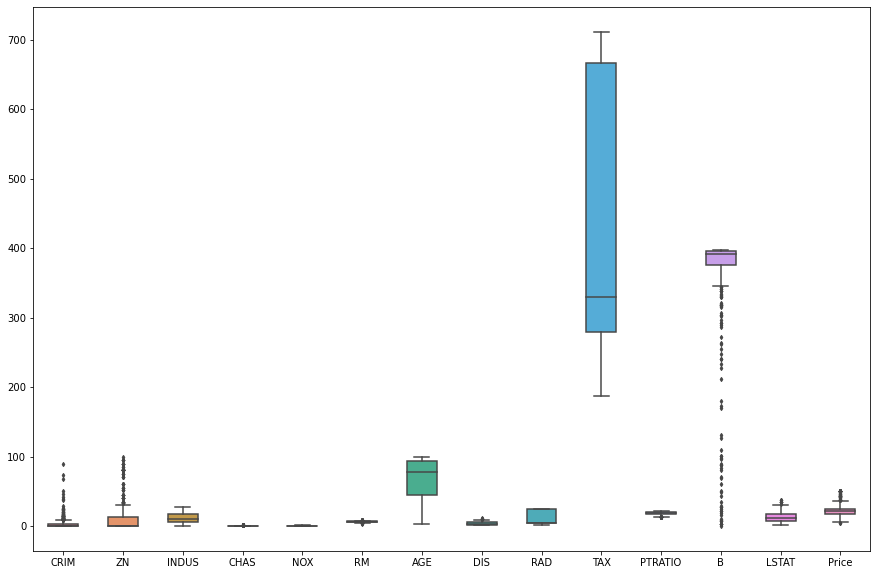

In [15]:
#Let's check for the presence of outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=boston_data, width= 0.5,ax=ax,  fliersize=3)


### Normalizing the data/Feature Scaling




In [16]:
feature_scale=[feature for feature in boston_data.columns if feature not in ['Price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(boston_data[feature_scale])

#Can also use Standard Scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
scaler.transform(boston_data[feature_scale])

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [18]:
data = pd.concat([boston_data[['Price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(boston_data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [19]:
data

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,21.6,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,34.7,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,33.4,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,36.2,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,20.6,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,23.9,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,22.0,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [20]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [21]:
X = data.iloc[:,1:]
y = data[['Price']]

In [22]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [24]:
X.shape,y.shape

((506, 13), (506, 1))

In [25]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

##### Specify the Lasso Regression model
##### Select a suitable alpha (equivalent of penalty). The bigger the alpha the less features that will be selected.
##### Use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero

In [26]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [27]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [28]:
#Print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))
# all the features that are are not necessary is shrunk to 0

total features: 13
selected features: 11
features with coefficients shrank to zero: 2


In [29]:
X_feat=X[selected_feat]
X_feat

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.0,0.314815,0.577505,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.0,0.172840,0.547998,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.0,0.172840,0.694386,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.0,0.150206,0.658555,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.0,0.150206,0.687105,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.0,0.386831,0.580954,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.0,0.386831,0.490324,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.0,0.386831,0.654340,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.0,0.386831,0.619467,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [30]:
selected_feat

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

'Draw the heatmap with the mask and correct aspect ratio'

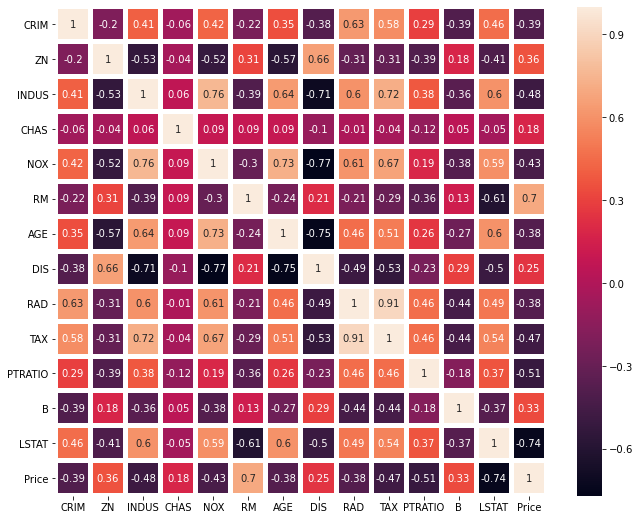

In [31]:
#Let's now create a correlation matrix that measures the linear relationships between the variables. 
correlation_matrix = boston_data.corr().round(2)
# annot = True to print the values inside the square
f , ax = plt.subplots(figsize=(11,9))
sns.heatmap(data=correlation_matrix, annot=True, linewidths = 4)
"""Draw the heatmap with the mask and correct aspect ratio"""
#sns.heatmap(corr , mask = mask , cmap=cmap , vmax=.3, center=0 , annot=True,
 #          square = True , linewidths=5 , cbar_kws={'shrink':.5});


Some observations: By looking at the correlation matrix we can see that RM has a strong positive correlation with Price (0.7) where as LSTAT has a high negative correlation with Price(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

In [32]:
def getCorrleatedFeature(corrdata,threshold):
    feature =[]
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df
    

In [33]:
threshold = 0.50
corr_value = getCorrleatedFeature(correlation_matrix['Price'],threshold)
corr_value

,Corr Value
RM,0.70
PTRATIO,-0.51
LSTAT,-0.74
Price,1.00


In [34]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.30 , random_state = 0)

In [36]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [37]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred = model.predict(X_test)
y_pred

array([23.931, 25.812, 22.424, 10.943, 20.444, 20.865, 21.193, 19.912,
       19.573, 18.803,  8.288, 14.754, 15.178,  9.122, 47.55 , 34.327,
       20.884, 34.931, 25.976, 21.222, 23.577, 21.937, 19.634, 24.156,
       20.426, 16.863, 18.674, 15.988, 43.143, 18.555, 14.859, 17.894,
       20.376, 20.558, 23.079, 18.641,  8.96 , 26.049, 14.023, 14.851,
       22.804, 20.806, 22.431, 14.913, 23.423, 22.719, 20.973, 16.256,
       14.947, 25.62 , 16.47 , 19.566, 20.502, 41.217, 14.915, 20.253,
       19.885, 18.812, 20.772, 20.445, 21.216, 20.924, 32.952, 29.57 ,
       18.468, 27.142, 16.159, 18.181, 18.221, 21.503, 20.181, 22.636,
       24.329, 32.128, 28.759,  9.265, 42.833, 21.678, 22.57 , 19.355,
       26.749, 18.235, 21.215, 42.538, 41.731, 24.201, 22.717, 14.455,
       25.912, 16.115, 19.139, 12.946, 22.771, 30.655, 21.179, 22.19 ,
       11.42 , 23.395, 14.886, 19.077, 23.577, 19.691, 28.043, 20.76 ,
       28.261, 20.14 ,  8.821, 19.078, 21.71 , 23.075, 35.906, 13.374,
      

In [39]:
model.score(X_train, y_train)

0.9807898827769441

In [40]:
model.score(X_test, y_test)

0.8025027042834701

In [41]:
model2 = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
model2.fit(X_train, y_train)

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=0, verbose=0, warm_start=False)

In [42]:
model2_pred = model2.predict(X_test)
model2_pred

array([23.9008, 28.8294, 22.0498, 10.9232, 20.4418, 20.8458, 21.1572,
       20.2916, 19.6032, 18.4242,  8.6448, 14.8322, 14.6902,  8.9808,
       47.6666, 33.86  , 21.0888, 34.7636, 25.666 , 21.1528, 23.7724,
       22.0068, 19.6074, 24.2346, 20.6674, 17.4312, 18.7672, 16.1064,
       43.9744, 18.5838, 14.8674, 17.611 , 20.323 , 20.7784, 22.8666,
       17.6708,  8.654 , 28.9688, 14.2338, 14.6902, 22.9136, 20.9586,
       22.3214, 15.1464, 23.349 , 22.6046, 20.6684, 16.47  , 14.9106,
       25.2708, 16.0934, 19.8356, 20.2718, 40.3698, 15.006 , 20.0504,
       19.75  , 18.8306, 22.2218, 20.0408, 21.486 , 20.8718, 32.971 ,
       29.1754, 18.5912, 27.2444, 16.2094, 17.765 , 17.6194, 21.7868,
       20.0412, 22.6574, 24.6574, 31.3132, 28.9992,  9.066 , 43.8216,
       21.9348, 22.6462, 19.539 , 26.9264, 18.1326, 22.2178, 43.3126,
       42.2628, 24.3296, 23.007 , 14.4018, 25.583 , 16.1706, 18.9912,
       12.881 , 22.626 , 30.2942, 21.1944, 22.0312, 11.641 , 23.2806,
       14.902 , 18.9

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [44]:
print("Test Accuracy:" , format(metrics.r2_score(y_test , model2_pred) * 100, '.2f'),'%')


Test Accuracy: 82.40 %
